# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [45]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [46]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [47]:
#  1. Get the total rides for each city type
total_rides_by_city_type=pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [48]:
# 2. Get the total drivers for each city type
total_drives_by_city_type=city_data_df.groupby(["type"]).sum()["driver_count"]
total_drives_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [49]:
#  3. Get the total amount of fares for each city type
total_fares_by_city_type=pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [50]:
#  4. Get the average fare per ride for each city type. 
avg_fare_city_type=total_fares_by_city_type/total_rides_by_city_type
avg_fare_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [51]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver_type=total_fares_by_city_type/total_drives_by_city_type
avg_fare_driver_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [52]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame()
pyber_summary_df["Total Rides"]=total_rides_by_city_type
pyber_summary_df["Total Drivers"]=total_drives_by_city_type
pyber_summary_df["Total Fares"]=total_fares_by_city_type
pyber_summary_df["Average Fare per Ride"]=avg_fare_city_type
pyber_summary_df["Average Fare per Driver"]=avg_fare_driver_type

pyber_summary_df



,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [53]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [54]:
#  8. Format the columns.

pyber_summary_df["Total Rides"]=pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"]=pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"]=pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"]=pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df
                                                                                            
                                                                        



,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [55]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [62]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
city_date_df=pyber_data_df.groupby(["type","date"]).sum()["fare"]
city_date_df


type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [67]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
city_date_df=city_date_df.reset_index()
city_date_df.head(10)

,index,type,date,fare
0,0,Rural,2019-01-01 09:45:36,43.69
1,1,Rural,2019-01-02 11:18:32,52.12
2,2,Rural,2019-01-03 19:51:01,19.90
3,3,Rural,2019-01-04 03:31:26,24.88
4,4,Rural,2019-01-06 07:38:40,47.33
5,5,Rural,2019-01-08 06:19:45,19.39
6,6,Rural,2019-01-09 15:30:35,31.84
7,7,Rural,2019-01-11 04:39:27,16.42
8,8,Rural,2019-01-14 07:09:17,18.05
9,9,Rural,2019-01-14 15:58:48,54.10


In [64]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
city_date_pivot = city_date_df.pivot(index="date", columns="type", values="fare")
city_date_pivot.index=pd.to_datetime(city_date_pivot.index)
city_date_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [65]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

new_date_df=city_date_pivot.loc['2019-01-01':'2019-04-29']

In [68]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
new_date_df.index=pd.to_datetime(new_date_df.index)


In [69]:
# 7. Check that the datatype for the index is datetime using df.info()
new_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB


In [70]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares=new_date_df.resample("w").sum()
weekly_fares.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-07,501.24,1010.73,2356.70
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1357.75,2238.29
2019-05-05,67.60,167.92,342.63


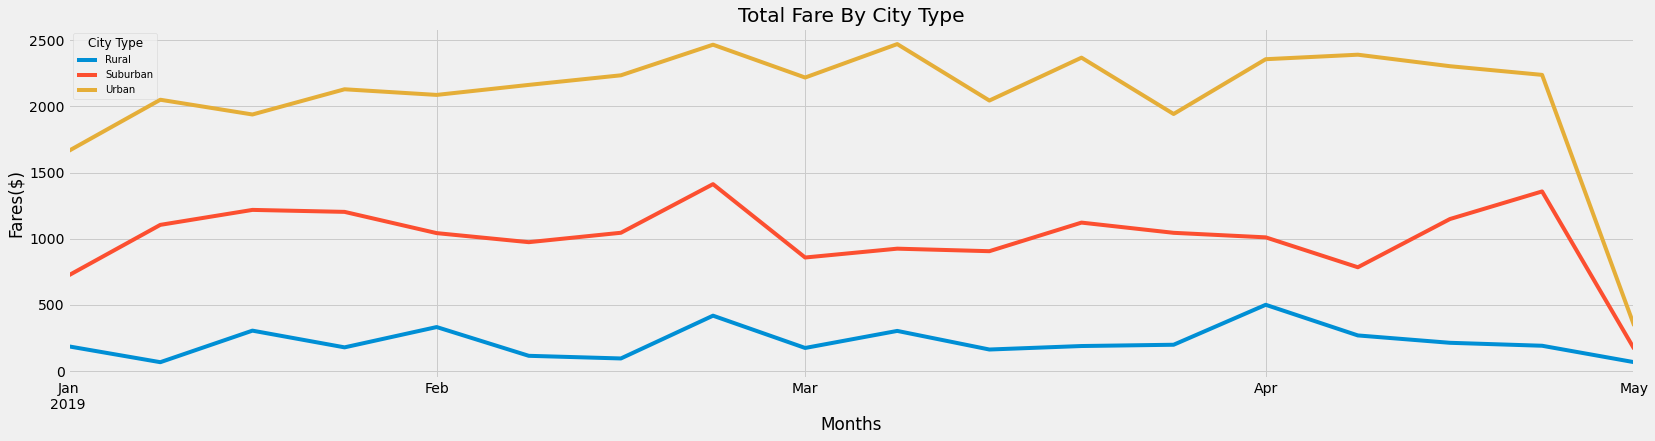

In [76]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function.
weekly_graph=weekly_fares.plot(figsize=(25,6))
weekly_graph.set_title("Total Fare By City Type")
weekly_graph.set_xlabel("Months")
weekly_graph.set_ylabel("Fares($)")
# Create a legend
lgnd = plt.legend(fontsize="10", loc="best", title="City Type")
lgnd.get_title().set_fontsize(12)
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save figure
plt.savefig("analysis/Challenge.jpg")

# Show figure
plt.show()
